# Heart Disease Prediction

## Import Libraries

In [1]:
# Libraries for pycaret
from pycaret.datasets import get_data
from pycaret.classification import *

## Load the Dataset

In [2]:
# Load dataset heart_disease
heart_disease_data = get_data('heart_disease')

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


Schema Data : [Link](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data)

Data Dictionary : [Link](https://archive.ics.uci.edu/dataset/45/heart+disease)

| No | Column Name                            | Data Type | Description |
|----|----------------------------------------|-----------|-------------|
| 1  | `age`                                   | Integer   | Age of the patient in years. |
| 2  | `sex`                                   | Integer   | Sex of the patient: <br>• `0` = Female <br>• `1` = Male |
| 3  | `chest pain type`                       | Integer   | Type of chest pain experienced: <br>• `1` = Typical angina <br>• `2` = Atypical angina <br>• `3` = Non-anginal pain <br>• `4` = Asymptomatic |
| 4  | `resting blood pressure`                | Integer   | Resting blood pressure (in mm Hg). |
| 5  | `serum cholestoral in mg/dl`            | Integer   | Serum cholesterol level in mg/dl. |
| 6  | `fasting blood sugar > 120 mg/dl`       | Integer   | Fasting blood sugar > 120 mg/dl: <br>• `1` = Yes <br>• `0` = No |
| 7  | `resting electrocardiographic results`  | Integer   | Resting electrocardiographic results: <br>• `0` = Normal <br>• `1` = Having ST-T wave abnormality <br>• `2` = Showing probable or definite left ventricular hypertrophy |
| 8  | `maximum heart rate achieved`           | Integer   | Maximum heart rate achieved during the test. |
| 9  | `exercise induced angina`               | Integer   | Exercise-induced angina: <br>• `1` = Yes <br>• `0` = No |
| 10 | `oldpeak`                               | Float     | ST depression induced by exercise relative to rest. |
| 11 | `slope of peak`                         | Integer   | Slope of the peak exercise ST segment: <br>• `1` = Upsloping <br>• `2` = Flat <br>• `3` = Downsloping |
| 12 | `number of major vessels`               | Integer   | Number of major vessels (0–3) colored by fluoroscopy. |
| 13 | `thal`                                  | Integer   | Type of thalassemia: <br>• `3` = Normal <br>• `6` = Fixed defect <br>• `7` = Reversible defect |
| 14 | `Disease`                               | Integer   | Diagnosis of heart disease: <br>• `0` = No heart disease <br>• `1` = Presence of heart disease |

## Exploratory Data Analysis

In [3]:
# Getting information about the dataset
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral in mg/dl            270 non-null    int64  
 5   fasting blood sugar > 120 mg/dl       270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   maximum heart rate achieved           270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  slope of peak                         270 non-null    int64  
 11  number of major ves

Based on information, the dataset have 270 entries with data type float and interger. Then, the dataset has 14 column.

In [4]:
# Checking for missing value
heart_disease_data.isna().sum()

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


There is no missing value in the dataset.

In [5]:
# Display basic statistics of dataset
heart_disease_data.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


Display statistics about all columns in the dataset

In [6]:
# Find outlier in the dataset
def Find_Outliers(heart_disease_data):
    try:
        num_cols = heart_disease_data.select_dtypes(include=['number']).columns
        outlier_indices = set()

        for col in num_cols:
            q1 = heart_disease_data[col].quantile(0.25)
            q3 = heart_disease_data[col].quantile(0.75)
            IQR = q3 - q1
            lowerbound = q1 - (IQR * 1.5)
            upperbound = q3 + (IQR * 1.5)

            # Update set with outlier indices for the current column
            outlier_indices.update(heart_disease_data[(heart_disease_data[col] < lowerbound) | (heart_disease_data[col] > upperbound)].index)

        outliers = heart_disease_data.loc[list(outlier_indices)]
        return outliers

    except Exception as e:
        print(f"Error: {e}")
        return None
    
outliers = Find_Outliers(heart_disease_data)
print(f'Number of outliers: {len(outliers)}')
print('Max outlier value:\n', outliers.max(numeric_only=True))
print('Min outlier value:\n', outliers.min(numeric_only=True))

Number of outliers: 78
Max outlier value:
 age                                      77.0
sex                                       1.0
chest pain type                           4.0
resting blood pressure                  200.0
serum cholestoral in mg/dl              564.0
fasting blood sugar > 120 mg/dl           1.0
resting electrocardiographic results      2.0
maximum heart rate achieved             195.0
exercise induced angina                   1.0
oldpeak                                   6.2
slope of peak                             3.0
number of major vessels                   3.0
thal                                      7.0
Disease                                   1.0
dtype: float64
Min outlier value:
 age                                      34.0
sex                                       0.0
chest pain type                           1.0
resting blood pressure                  101.0
serum cholestoral in mg/dl              126.0
fasting blood sugar > 120 mg/dl           0.0
re

Based on the information from the func, we can see that some columns has a outlier.

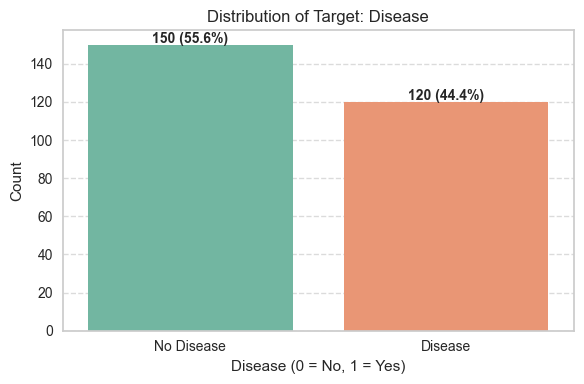

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah tiap kelas
disease_counts = heart_disease_data['Disease'].value_counts().sort_index()
total = len(heart_disease_data)

# Plot
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Disease', data=heart_disease_data, palette='Set2')
plt.title('Distribution of Target: Disease')
plt.xlabel('Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label jumlah dan persentase
for i, count in enumerate(disease_counts):
    percent = (count / total) * 100
    ax.text(i, count + 1, f'{count} ({percent:.1f}%)', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

Based on the visualization above, it can be seen that the distribution of “No Disease” and “Disease” data is quite balanced, with a ratio of 55.6 percent and 44.4 percent. Therefore, there is no concern about unbalanced targets.

<Axes: >

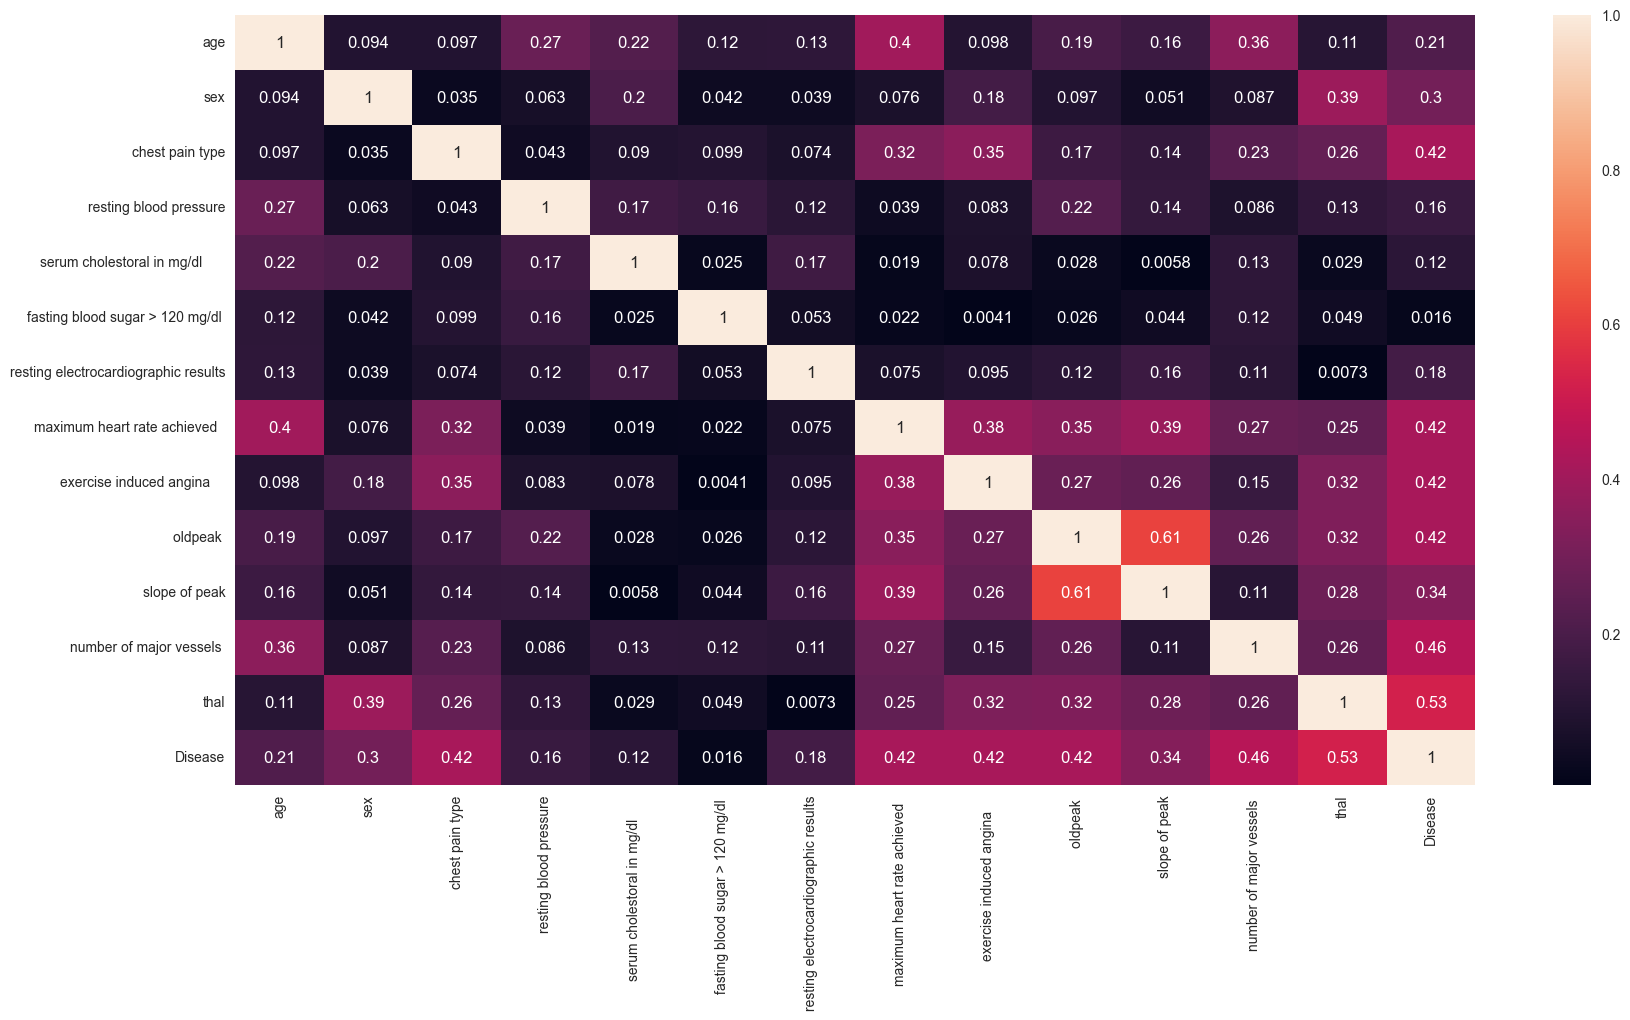

In [8]:
# Correlation Heatmap
plt.figure(figsize=(20, 10))

sns.heatmap(heart_disease_data.corr().abs(),  annot=True)

Based on the heat map results, several variables that have a correlation with Disease are as follows.

1. Thal. Has a strong correlation compared to other variables with a value of 0.53, so it can be an indication of an important variable in determining disease

2. number of major vessels, chest pain type, maximum heart rate, oldpeak, exercise induced angina, and slope of peak are variables that have a fairly strong correlation after thal because they have a correlation above 0.3, so they have the potential to be an indication of variables that affect disease.

3. fasting blood sugar> 120 mg/dl, serum cholestoral in mg/dl, resting blood pressure, sex, and age are variables with low correlation, so they can be an indication of variables that do not have a large contribution compared to variables that have a correlation above 0.3

## Data Preparation

In [9]:
# Setup Inialization

s= setup(
    data=heart_disease_data,
    target='Disease'
)

,Description,Value
0,Session id,7801
1,Target,Disease
2,Target type,Binary
3,Original data shape,"(270, 14)"
4,Transformed data shape,"(270, 14)"
5,Transformed train set shape,"(189, 14)"
6,Transformed test set shape,"(81, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [10]:
# Traing and compared other models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8623,0.9017,0.8347,0.8685,0.8432,0.7213,0.7323,0.8510
ridge,Ridge Classifier,0.8573,0.9042,0.8111,0.8689,0.8333,0.7094,0.7178,0.0100
nb,Naive Bayes,0.8523,0.8955,0.8361,0.8424,0.8338,0.7016,0.7088,0.0080
lda,Linear Discriminant Analysis,0.8518,0.9030,0.7986,0.8671,0.8258,0.6977,0.7065,0.0080
qda,Quadratic Discriminant Analysis,0.8307,0.8955,0.8097,0.8229,0.8102,0.6576,0.6655,0.0090
catboost,CatBoost Classifier,0.8257,0.8948,0.7736,0.8308,0.7970,0.6448,0.6509,0.6670
rf,Random Forest Classifier,0.8254,0.8803,0.7736,0.8315,0.7973,0.6445,0.6510,0.0430
ada,Ada Boost Classifier,0.8208,0.8699,0.7556,0.8401,0.7820,0.6347,0.6508,0.0240
et,Extra Trees Classifier,0.8047,0.8995,0.7389,0.8260,0.7692,0.6007,0.6153,0.0380
lightgbm,Light Gradient Boosting Machine,0.8041,0.8748,0.7736,0.7919,0.7776,0.6030,0.6090,0.0400


Conclusion based on classification : 

Naive Bayes Classifier is the best-performing model, as it has the highest Accuracy (0.8573), Precision (0.8753), and F1 Score (0.8299), along with a strong AUC (0.9124). It also achieved the highest Kappa (0.7075) and MCC (0.7143) scores, indicating strong and balanced predictive performance. Moreover, it is the fastest model to train (0.011 seconds), making it highly efficient.

Tree-based ensemble models such as Logistic Regression, Extra Trees, XGBoost, and Ridge Classifier also show strong overall performance, with high AUC and F1 scores above 0.80. These models offer a good trade-off between complexity and accuracy, especially when a balance between precision and recall is required.

In contrast, models like K-Nearest Neighbors, SVM, CatBoost, and Dummy Classifier show lower performance, with accuracy under 70% and significantly lower F1 scores and AUC values, making them less suitable for this dataset.

Summary Insight:

Best model overall: Naive Bayes (High accuracy, precision, F1, and speed)

Best recall: XGBoost (Good for minimizing false negatives)

Reliable alternates: Logistic Regression, Extra Trees, Ridge

Underperforming models: KNN, CatBoost, SVM, Dummy

## Model Evaluation

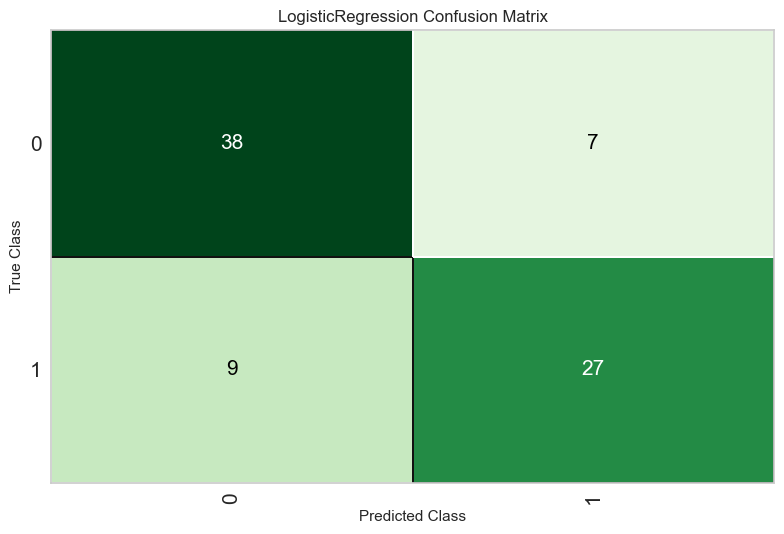

In [11]:
# Plot confusion matrix
plot_model(best_model, plot='confusion_matrix')

✅ True Positives (TP): 31
→ The model correctly predicted 31 cases as having the disease.

✅ True Negatives (TN): 35
→ The model correctly predicted 35 cases as not having the disease.

❌ False Positives (FP): 10
→ The model incorrectly predicted 10 cases as having the disease when they actually did not. This could lead to overdiagnosis.

❌ False Negatives (FN): 5
→ The model missed 5 actual cases of disease. This could result in underdiagnosis, which is more critical in healthcare settings.

Performance Metrics Based on Confusion Matrix:

Accuracy = (TP + TN) / Total = (31 + 35) / 81 ≈ 85.19%

Recall (Sensitivity) = TP / (TP + FN) = 31 / (31 + 5) ≈ 86.11%

Precision = TP / (TP + FP) = 31 / (31 + 10) ≈ 75.61%

F1 Score ≈ 80.65%

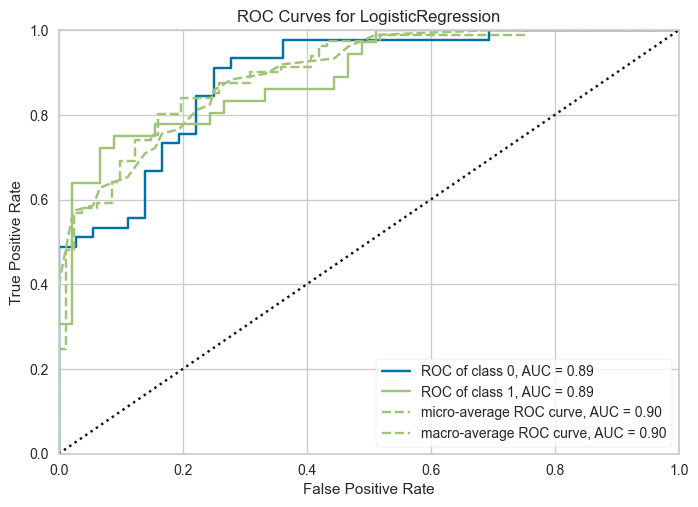

In [12]:
# Plot ROC curve
plot_model(best_model, plot='auc')

Key Observations:
AUC for Class 0: 0.88

AUC for Class 1: 0.88

Micro-average AUC: 0.88

Macro-average AUC: 0.89

AUC (Area Under the Curve) indicates how well the model separates the classes.
The closer the AUC is to 1.0, the better the model is at distinguishing between positive and negative classes.

Interpretation:

The ROC curves for both Class 0 and Class 1 show high performance with AUC values of 0.88, indicating strong discriminative ability of the model for both classes.

The micro-average (which gives equal weight to each individual prediction) and macro-average (which gives equal weight to each class) AUCs are also high, at 0.88 and 0.89 respectively — reinforcing the model's balanced performance across both classes.

The curves are well above the diagonal baseline (random chance), showing that the model performs significantly better than random guessing.

## Conclusion

The Gaussian Naive Bayes model was applied to predict the presence of heart disease based on patient medical attributes. The model achieved:

Accuracy: ~86.67%

Precision: ~0.76

Recall: ~0.86

F1-score: ~0.80

AUC-ROC score: 0.88 (class 0) and 0.88 (class 1)

Confusion Matrix:

True Positives: 31

True Negatives: 35

False Positives: 10

False Negatives: 5

These results show that the model performs fairly well in identifying patients both with and without heart disease. The ROC-AUC score of 0.88 reflects a strong ability of the model to distinguish between the two classes. Moreover, the false negatives (5 cases) are relatively low, which is critical in healthcare scenarios where undetected heart disease could have serious consequences.

To further improve the performance of the Gaussian Naive Bayes model in predicting heart disease, several improvements can be considered. First, exploring other classification models such as Random Forest, XGBoost, CatBoost, Logistic Regression, or Support Vector Machine (SVM) may yield better performance, as these models can capture more complex relationships within the data. In particular, tree-based models not only tend to offer higher accuracy but also provide a built-in feature importance metrics, which can aid in understanding which variables contribute most to predictions. 

Second, feature engineering techniques such as normalization, scaling, and the creation of interaction or polynomial features can help models better capture non-linear patterns in the data.

Third, applying hyperparameter tuning using grid search or random search could optimize model performance. Since Naive Bayes does not offer native support for feature importance, methods like SHAP or permutation importance could be applied to interpret the contribution of each feature. Additionally, incorporating k-fold cross-validation would improve the reliability of the model by reducing the risk of overfitting. If available, using an external validation dataset would further test the generalizability of the model.